<a href="https://colab.research.google.com/github/hisandan/ExploratoryDataAnalisys-puj/blob/main/proyectoBigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Pontifica Universidad Javeriana*

 *DPTO Ing Sistemas*

 **Materia** Procesamiento de Datos a Gran Escala

 **Autores:** Daniel Torres, Daniel Sandoval e Isaac Janica

**Fecha:**


Se importan las bibliotecas necesarias

In [ ]:
# Se importan de las bibliotecas necesarias
!pip install Pyspark
import pyspark
from pyspark import SparkContext  #Importa la clase Spark context
from pyspark.sql import SQLContext, Row, Column #SqlContext permite poder hacer queries y operaciones con DataFrames de spark
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from pyspark.ml.feature import DenseVector, StandardScaler

# Creación del objeto SparkContext para poder trabjar con PySpark y sus dataframes
sc = SparkContext.getOrCreate()
sql_sc = SQLContext(sc)
sc



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=1e98cb48520eed842dd1f04e617edac911d163355f4a0d0810c242c0f345049d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built Pyspark


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


<SparkContext master=local[*] appName=pyspark-shell>



#### Ingreso del dataframe a través de Link de raw.github


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
colli = pd.read_csv('/content/drive/MyDrive/A PUJ/data_engineering/Semester 3/big_data/project/datasets/Motor_Vehicle_Collisions_-_Vehicles_20240304.csv')
arre = pd.read_csv('/content/drive/MyDrive/A PUJ/data_engineering/Semester 3/big_data/project/datasets/NYPD_Arrest_Data__Year_to_Date__20240301.csv')


<ipython-input-3-1c5a239ebbd3>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  colli = pd.read_csv('/content/drive/MyDrive/A PUJ/data_engineering/Semester 3/big_data/project/datasets/Motor_Vehicle_Collisions_-_Vehicles_20240304.csv')


# Colección y descripción de los datos:
## En este aparaado se realiza la carga de los datos y se describen los datos según los siguientes elementos:


## **Tipos de de Datos:**

In [ ]:
colli.dtypes

UNIQUE_ID                        int64
COLLISION_ID                     int64
CRASH_DATE                      object
CRASH_TIME                      object
VEHICLE_ID                      object
STATE_REGISTRATION              object
VEHICLE_TYPE                    object
VEHICLE_MAKE                    object
VEHICLE_MODEL                   object
VEHICLE_YEAR                   float64
TRAVEL_DIRECTION                object
VEHICLE_OCCUPANTS              float64
DRIVER_SEX                      object
DRIVER_LICENSE_STATUS           object
DRIVER_LICENSE_JURISDICTION     object
PRE_CRASH                       object
POINT_OF_IMPACT                 object
VEHICLE_DAMAGE                  object
VEHICLE_DAMAGE_1                object
VEHICLE_DAMAGE_2                object
VEHICLE_DAMAGE_3                object
PUBLIC_PROPERTY_DAMAGE          object
PUBLIC_PROPERTY_DAMAGE_TYPE     object
CONTRIBUTING_FACTOR_1           object
CONTRIBUTING_FACTOR_2           object
dtype: object

In [ ]:
colli.shape

(4154748, 25)

In [ ]:
arre.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [ ]:
arre.shape

(226872, 19)

In [ ]:
colli.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,10385780,100201,09/07/2012,9:03,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
2,14887647,3307608,10/02/2015,17:18,2,NY,TAXI,NaN,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN
3,14889754,3308693,10/04/2015,20:34,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
4,14400270,297666,04/25/2013,21:15,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Vehicular,NaN


In [ ]:
arre.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261265483,01/03/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,49,0,18-24,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
1,261271301,01/03/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,WHITE,962808,174275,40.644996,-74.077263,POINT (-74.077263 40.644996)
2,261336449,01/04/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,K,61,0,<18,M,BLACK,995118,155708,40.594054,-73.960866,POINT (-73.960866 40.594054)
3,261328047,01/04/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,114,0,18-24,M,BLACK,1007694,219656,40.769552,-73.915361,POINT (-73.915361 40.769552)
4,261417496,01/05/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,B,44,0,25-44,F,BLACK,1007174,239542,40.824135,-73.917170,POINT (-73.91717 40.824135)


## Comprensión del significado de cada atributos:
En este caso, se hizo un diccionario de datos del cuál se tiene el siguiente link con el tipo de dato y la descripción de este:
https://docs.google.com/spreadsheets/d/1qxFz3B2A_1QBr87w9vNeHROOM842oU2F/edit#gid=1666817735

https://docs.google.com/spreadsheets/d/1qxFz3B2A_1QBr87w9vNeHROOM842oU2F/edit#gid=1666817735


In [ ]:
arre['ARREST_KEY'].unique()

array([261265483, 261271301, 261336449, ..., 276962641, 278980006,
       276726082])

### Encontrando los valores nulos por cada columna


In [ ]:

print("Nulos por columna dentro del dataset de Collisions")
null_counts = colli.isnull().sum()
# Convert the null counts series to a DataFrame for better formatting
null_counts_df = pd.DataFrame(null_counts, columns=["Null Count"])

# Display the DataFrame
null_counts_df.head(26)
#print(colli.isnull().sum())

Nulos por columna dentro del dataset de Collisions


,Null Count
UNIQUE_ID,0
COLLISION_ID,0
CRASH_DATE,0
CRASH_TIME,0
VEHICLE_ID,0
STATE_REGISTRATION,299985
VEHICLE_TYPE,233571
VEHICLE_MAKE,1875745
VEHICLE_MODEL,4103370
VEHICLE_YEAR,1894945


In [ ]:
print("Nulos por columna dentro del dataset de Arrests")
print(arre.isnull().sum())

Nulos por columna dentro del dataset de Arrests
ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          2
PD_DESC                        0
KY_CD                         17
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1599
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64


## **Descripción general del contenido de los conjuntos de datos:**
###Lo que se encontró en los conjuntos de datos anteriores fue:
**DataSet de Arrestos**
- El DataSet de arrestos cuenta con 19 columnas y 226872 registros.
- Buena parte de los datos se encuentran en formato objeto, lo cuál no debería ser debido a que varios de estos son netamente numéricos.
- Con una revisión a priori, el conjunto de datos no presenta muchos valores nulos, o al menos, presenta una menor proporción que el DataSet de colisiones.
- El DataSet cuenta con la columna ARREST_KEY que es la que permite diferencia un registro del otro.
- Hay columnas como LAW_CODE que a priori presentan cierta complejidad para poder entender le contenido de esta.




**DataSet de Colisiones**
- El DataSet cuenta con 25 columnas y 4154748, un número bastante grande y que genera el tiempo de procesamiento de este sea mucho mayor que el DataSet de arrestos.
- Se cuenta con columnas como CRASH_DATE y CRASH_TIME que actualmente de tipo tiempo pero que pueden ser convertidas en en tipo Date y tipo Time. También hay otras variables en dónde estas son de tipo objeto pero podrían ser convertidas a variable de tipo numérico.
- Con una revisión a priori, el dataset presenta varias columnas con una enorme cantidad de nulos (hay columnas dónde el 50% o más de los registros son valores nulos).
- Este DataSet cuenta con 3 tipos diferentes de ID COLLISION_ID, UNIQUE_ID Y VEHICLE_ID. Dentro del diccionario de datos se explica que esto es debido a que esta tabla/DataSet es el resultado de un JOIN hecho entre dos tablas de una base de datos de la NYPD.
- Las columnas que no se entienden a priori son las de CONTRIBUTING_FACTOR.

# **Exploración de los datos:**
### En ese apartado se proccede a hacer uso de estadística descriptiva para tener una idea general de los datos por columnas. Las columnas que se van a estudiar son todas aquellas que no son 'llaves primarias', es decir, que su uso no es poder diferenciar un registro de otro.
### Se hará uso de histogramas, diagramas de pie y diagramas de líneas para poder graficar las diferentes variables. En el caso de las variables cualitativas se va a utilizar el diagrama de pie, en en el caso de las variables discretas se va a hacer uso diagramas de línea y de histogramas.


## **Exploración del DataSet de Colisiones:**

STATE_REGISTRATION
NY    3212367
NJ     234931
PA      86055
FL      47361
CT      43469
       ...   
T           1
AS          1
LR          1
MP          1
UA          1
Length: 82, dtype: int64


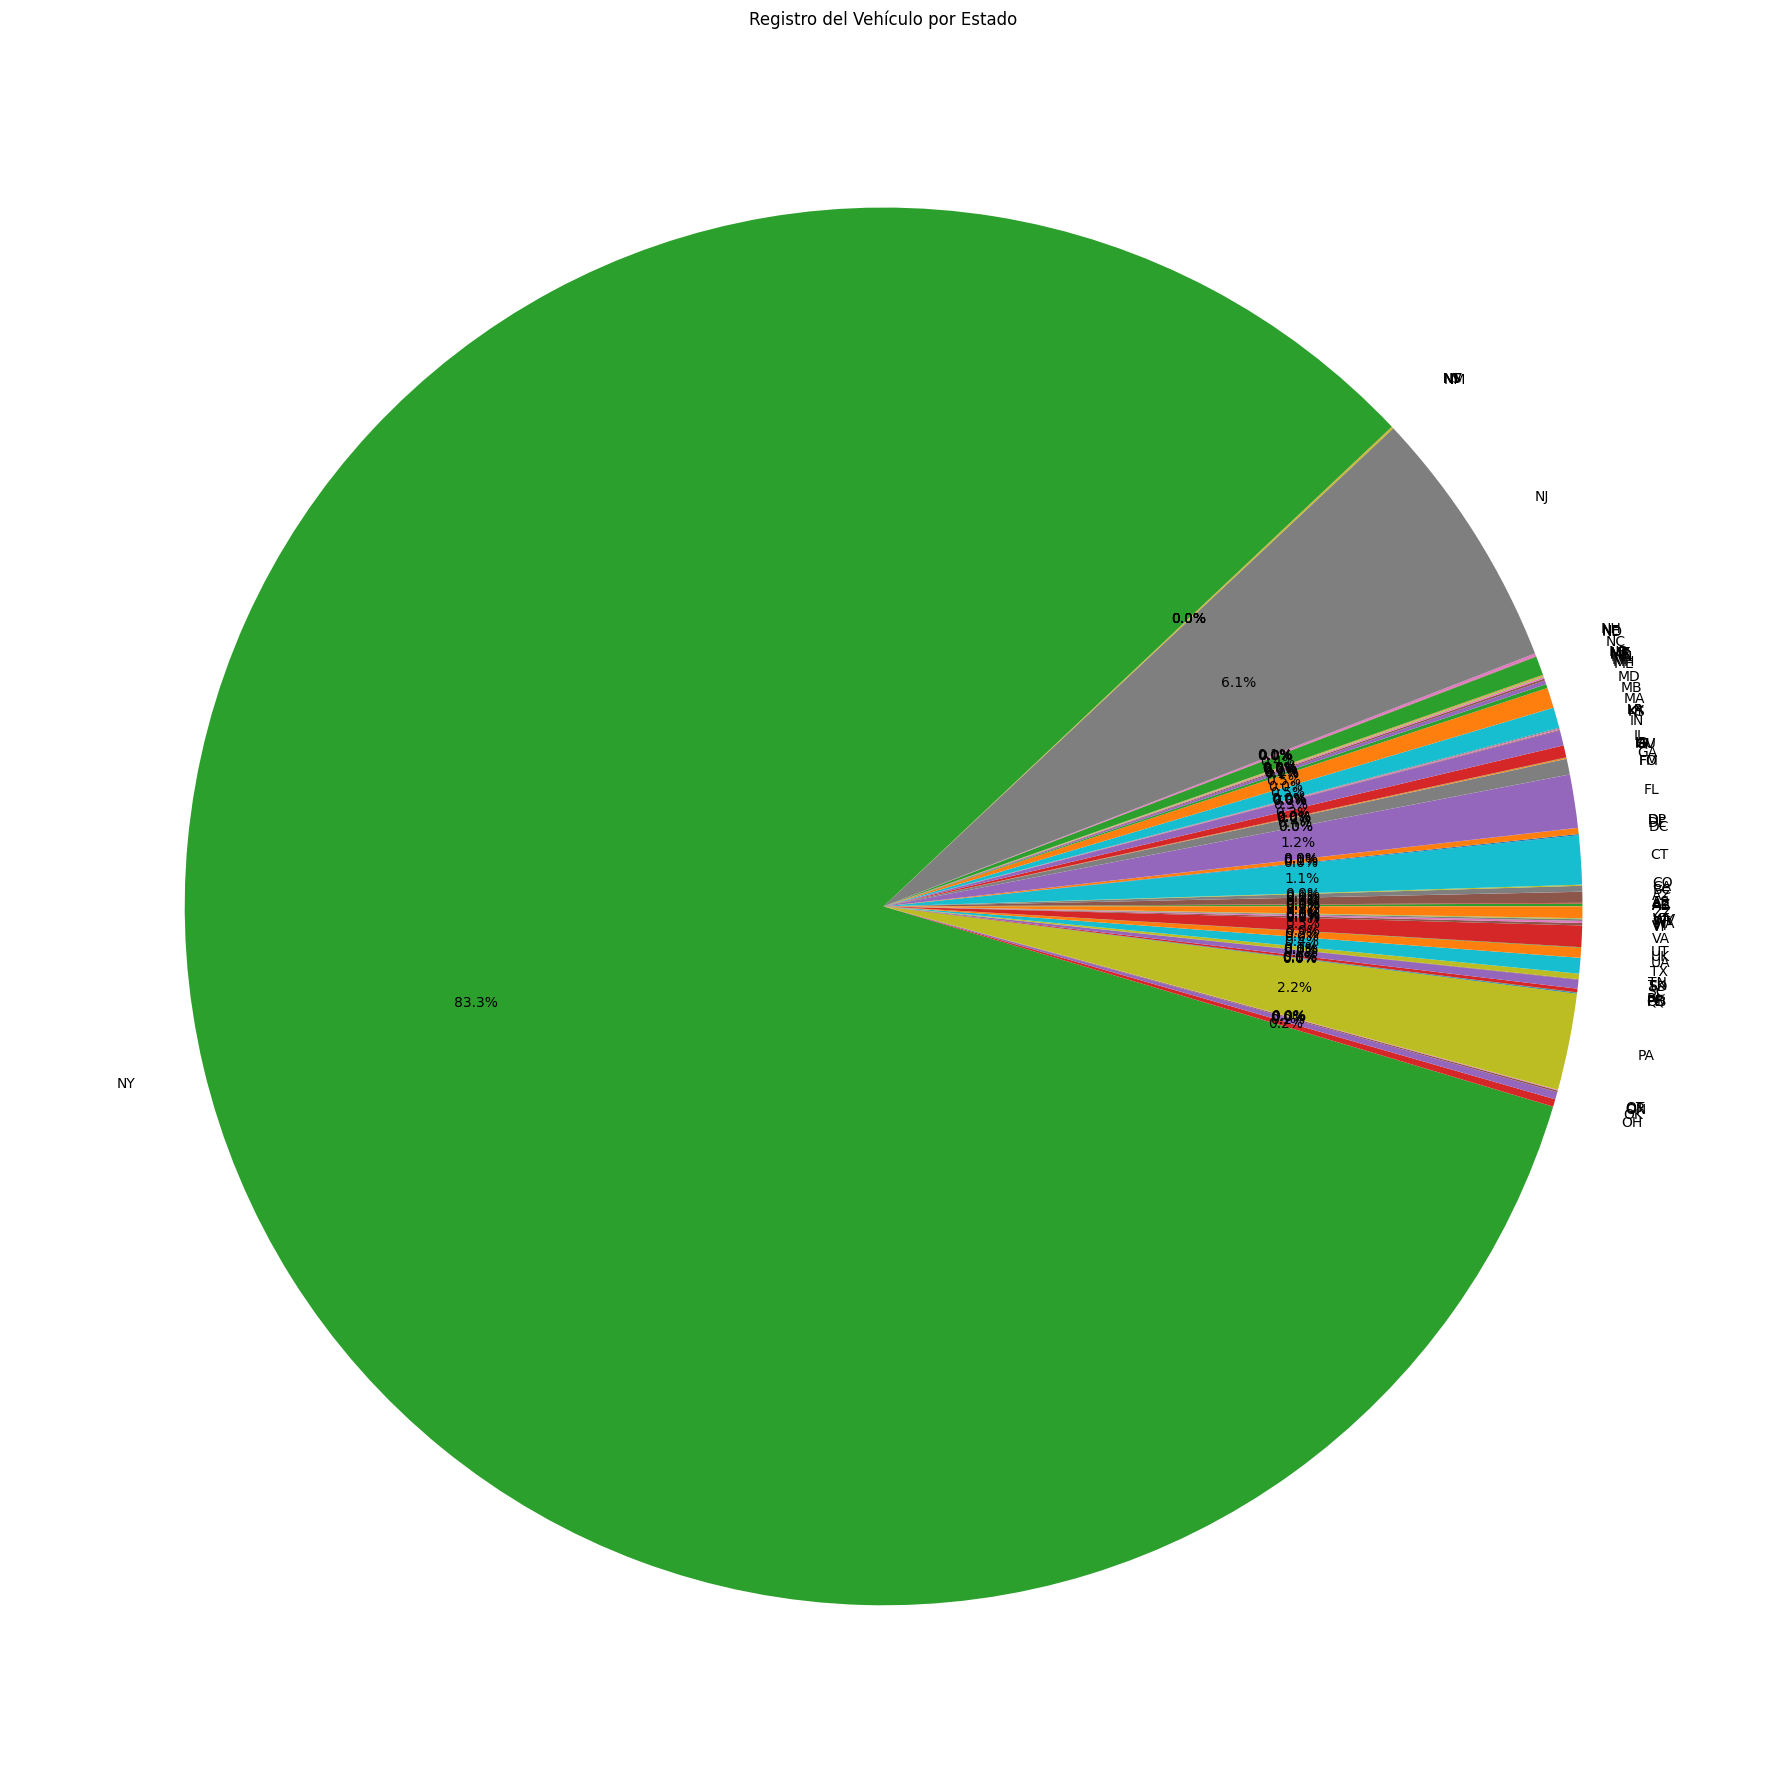

In [ ]:
print(colli.groupby('STATE_REGISTRATION').size().sort_values(ascending=False))
value_counts = colli.groupby('STATE_REGISTRATION').size()

plt.figure(figsize=(20, 18))  # Adjust the figure size as needed
plt.pie(value_counts.values, labels=value_counts.index, autopct="%1.1f%%")  # Format as percentage
plt.title("Registro del Vehículo por Estado")
plt.tight_layout()
plt.show()

VEHICLE_TYPE
Sedan                                  1036417
Station Wagon/Sport Utility Vehicle     826392
PASSENGER VEHICLE                       770753
SPORT UTILITY / STATION WAGON           337927
UNKNOWN                                 105461
                                        ...   
M/C                                          1
M/A                                          1
Lumbe                                        1
Ltrl                                         1
omm                                         1
Length: 2681, dtype: int64


<ipython-input-14-b6258dfaa277>:7: UserWarning: Glyph 127 () missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


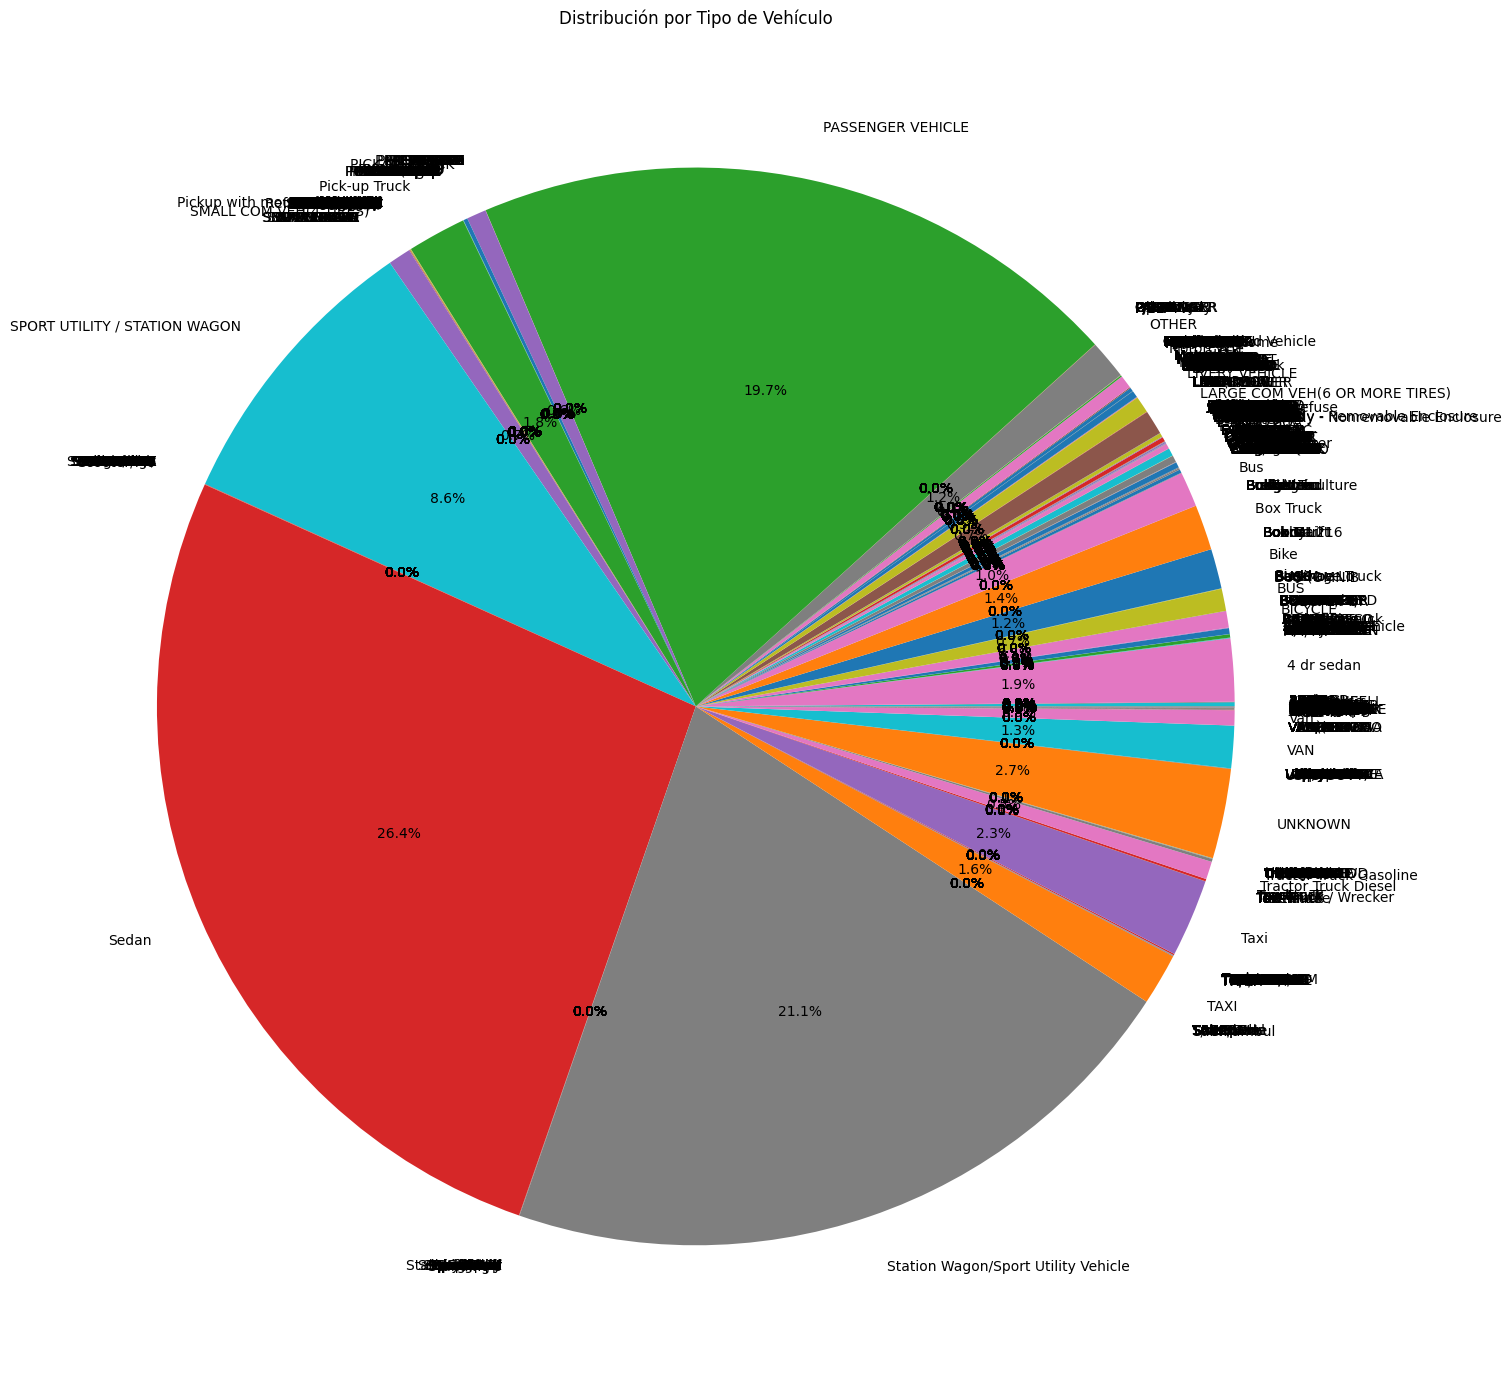

In [ ]:
print(colli.groupby('VEHICLE_TYPE').size().sort_values(ascending=False))
value_counts = colli.groupby('VEHICLE_TYPE').size()

plt.figure(figsize=(16, 14))  # Adjust the figure size as needed
plt.pie(value_counts.values, labels=value_counts.index, autopct="%1.1f%%")  # Format as percentage
plt.title("Distribución por Tipo de Vehículo")
plt.tight_layout()
plt.show()

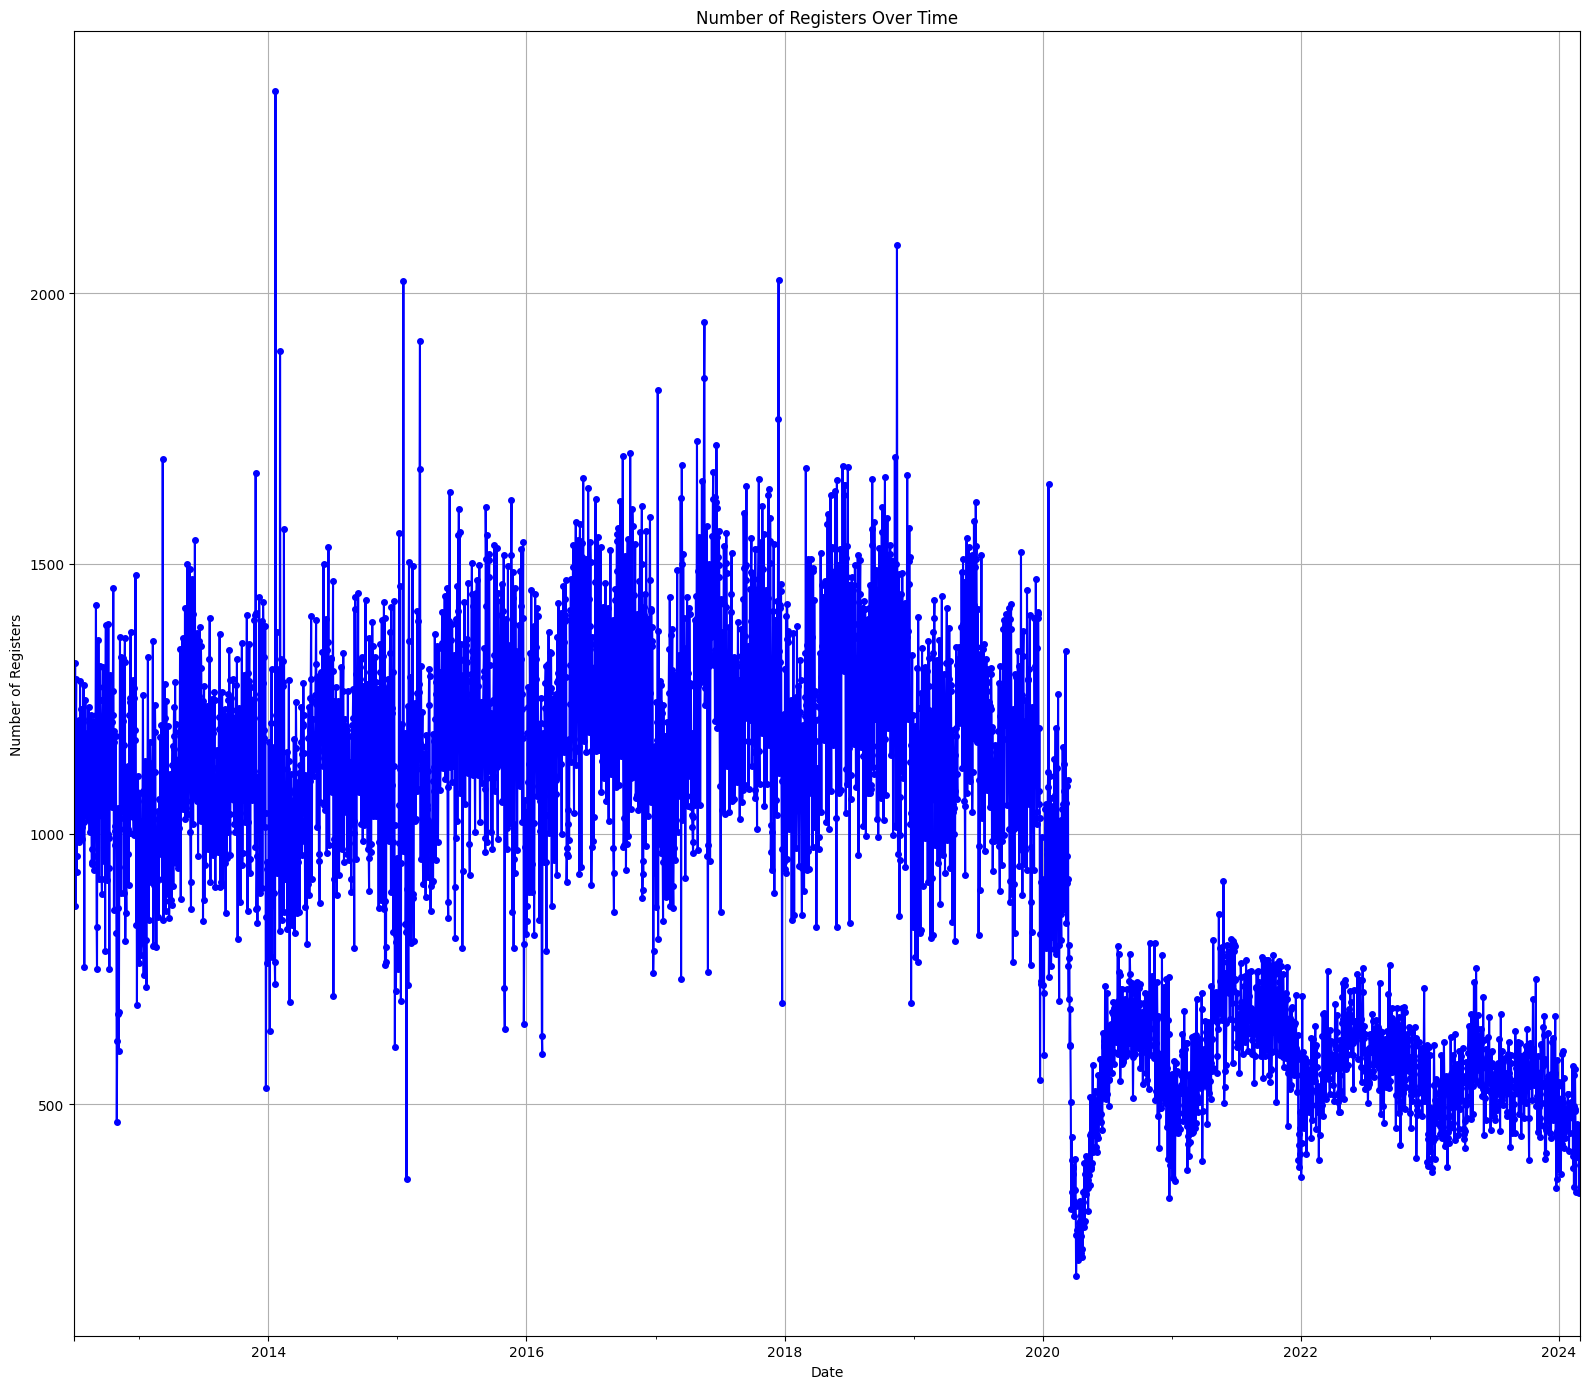

In [ ]:
colli['CRASH_DATE'] = pd.to_datetime(colli['CRASH_DATE'])
register_count = colli.groupby('CRASH_DATE').size()


plt.figure(figsize=(16, 14))
register_count.plot(kind='line', color='blue', marker='o', markersize=4, linestyle='-')
plt.title('Number of Registers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Registers')
plt.grid(True)
plt.tight_layout()
plt.show()

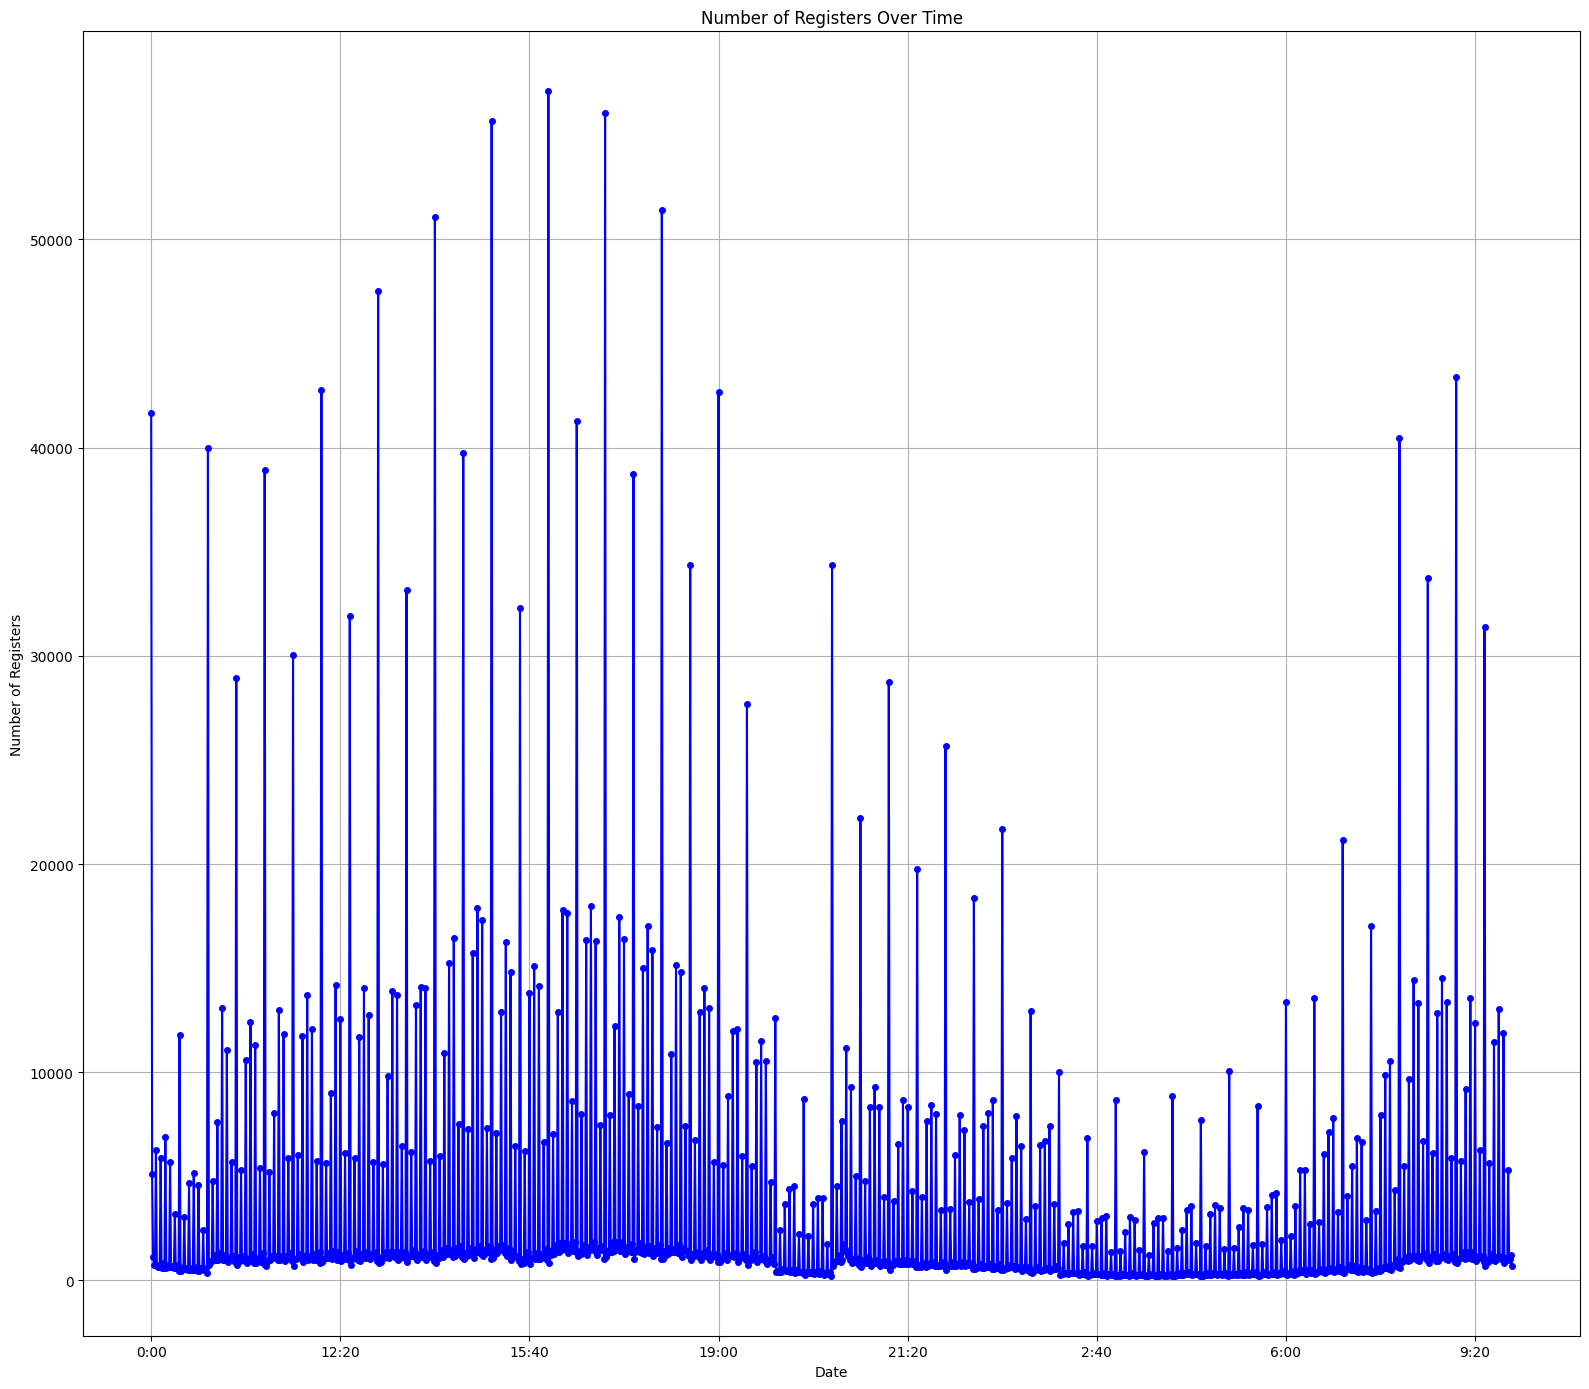

In [ ]:
register_count = colli.groupby('CRASH_TIME').size()

plt.figure(figsize=(16, 14))
register_count.plot(kind='line', color='blue', marker='o', markersize=4, linestyle='-')
plt.title('Number of Registers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Registers')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Exploración de Datos DataSet de Arrestos**


In [ ]:

print(arre.groupby('OFNS_DESC').size().sort_values(ascending=False))
arre['OFNS_DESC'].unique()

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      33839
PETIT LARCENY                     23888
FELONY ASSAULT                    21121
DANGEROUS DRUGS                   15701
MISCELLANEOUS PENAL LAW           14862
                                  ...  
HOMICIDE-NEGLIGENT-VEHICLE            3
FELONY SEX CRIMES                     3
ADMINISTRATIVE CODES                  2
DISRUPTION OF A RELIGIOUS SERV        2
UNLAWFUL POSS. WEAP. ON SCHOOL        1
Length: 64, dtype: int64


array(['ROBBERY', 'FELONY ASSAULT', 'BURGLARY', 'ARSON',
       'CRIMINAL TRESPASS', 'ASSAULT 3 & RELATED OFFENSES', 'RAPE',
       'FORGERY', 'PETIT LARCENY', 'SEX CRIMES', 'THEFT-FRAUD',
       'JOSTLING', 'MISCELLANEOUS PENAL LAW', 'VEHICLE AND TRAFFIC LAWS',
       'FRAUDS', 'OFFENSES INVOLVING FRAUD',
       'OTHER OFFENSES RELATED TO THEF', 'DANGEROUS WEAPONS',
       'DANGEROUS DRUGS', 'MURDER & NON-NEGL. MANSLAUGHTE',
       'CRIMINAL MISCHIEF & RELATED OF', 'OTHER STATE LAWS (NON PENAL LA',
       'OFFENSES AGAINST THE PERSON', 'INTOXICATED & IMPAIRED DRIVING',
       'OFFENSES AGAINST PUBLIC ADMINI', 'NYS LAWS-UNCLASSIFIED FELONY',
       'GRAND LARCENY', 'CANNABIS RELATED OFFENSES',
       'GRAND LARCENY OF MOTOR VEHICLE', 'POSSESSION OF STOLEN PROPERTY',
       'OTHER STATE LAWS', 'OFF. AGNST PUB ORD SENSBLTY &',
       'FOR OTHER AUTHORITIES', 'UNAUTHORIZED USE OF A VEHICLE',
       'OTHER TRAFFIC INFRACTION', "BURGLAR'S TOOLS",
       'ALCOHOLIC BEVERAGE CONTROL LAW', 'KI

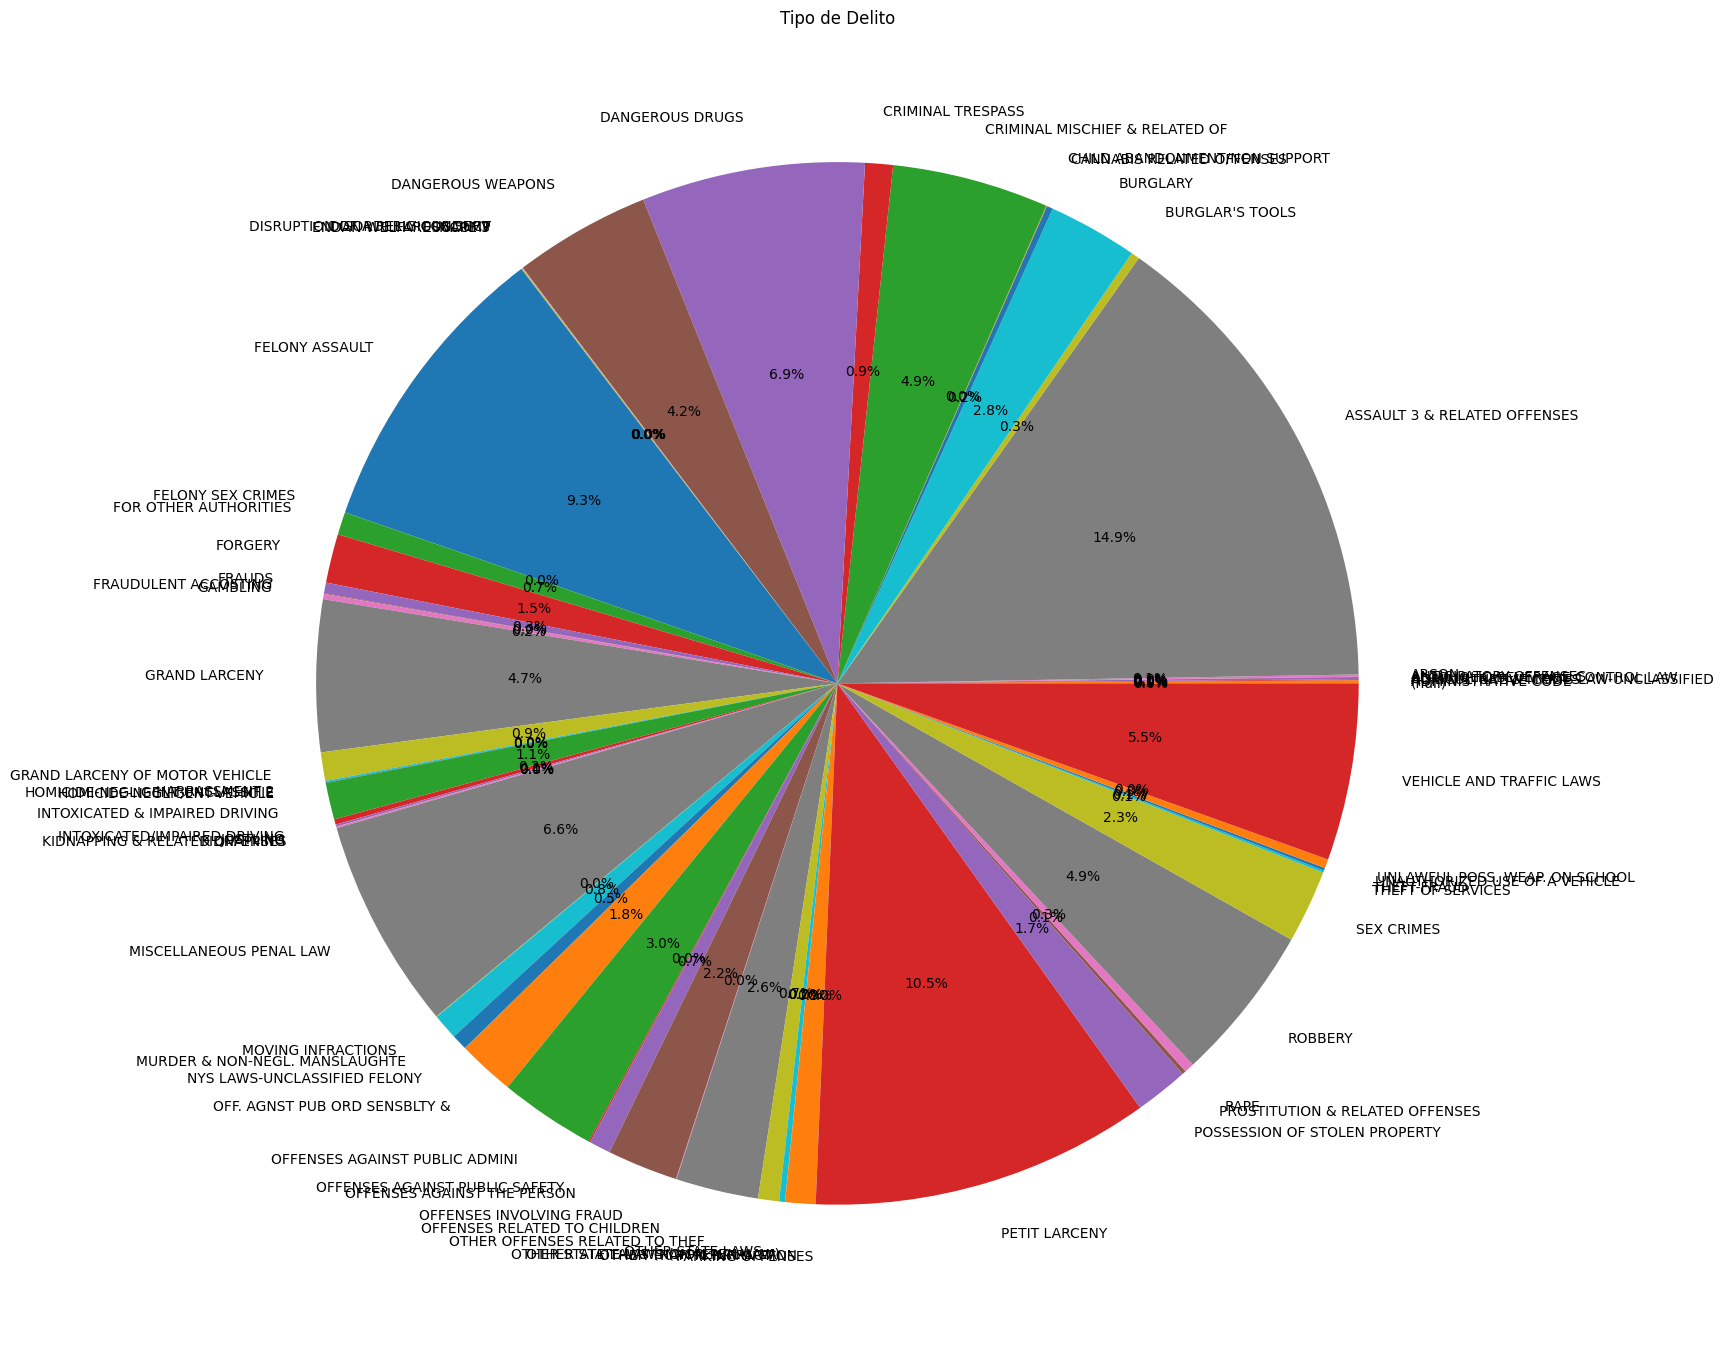

In [ ]:
value_counts = arre.groupby('OFNS_DESC').size()

plt.figure(figsize=(16, 14))  # Adjust the figure size as needed
plt.pie(value_counts.values, labels=value_counts.index, autopct="%1.1f%%")  # Format as percentage
plt.title("Tipo de Delito")
plt.tight_layout()
plt.show()

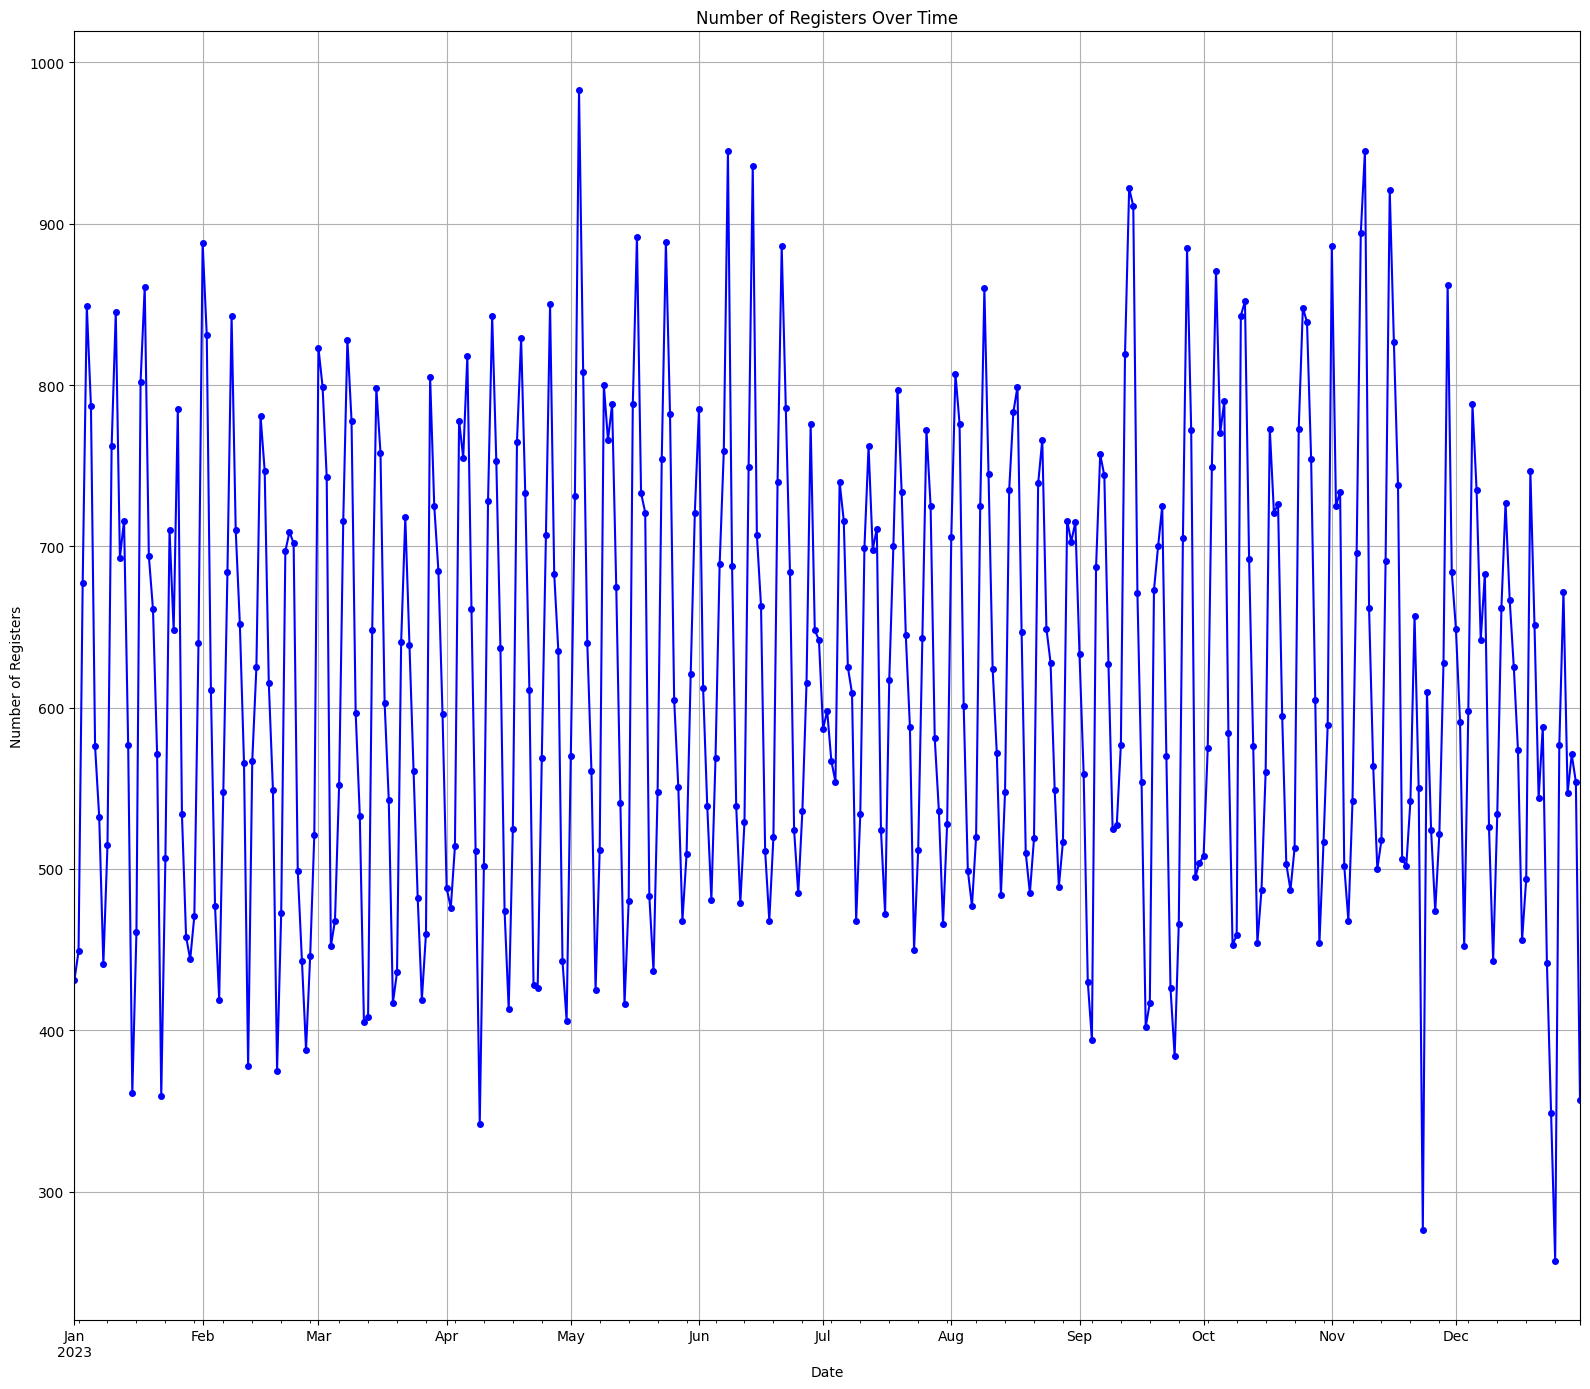

In [ ]:
arre['ARREST_DATE'] = pd.to_datetime(arre['ARREST_DATE'])
register_count = arre.groupby('ARREST_DATE').size()


plt.figure(figsize=(16, 14))
register_count.plot(kind='line', color='blue', marker='o', markersize=4, linestyle='-')
plt.title('Number of Registers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Registers')
plt.grid(True)
plt.tight_layout()
plt.show()

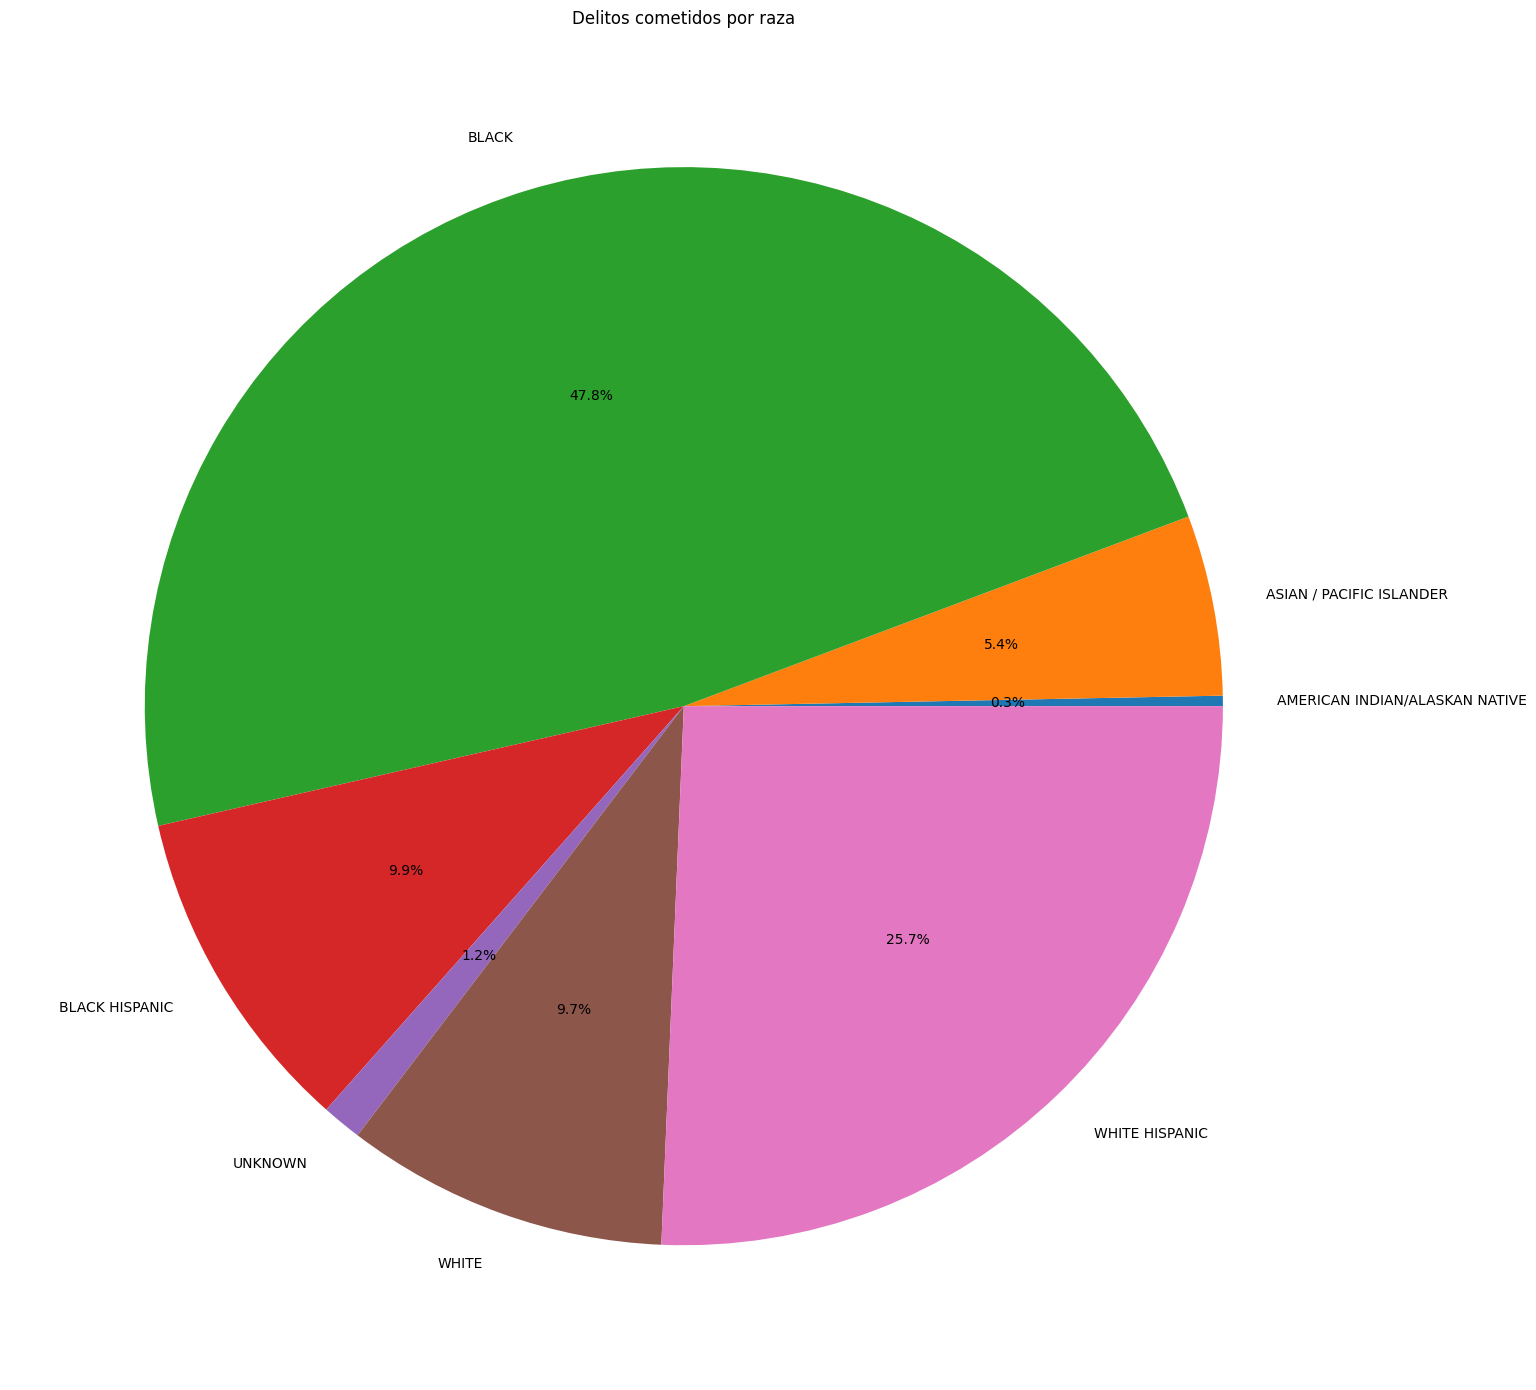

In [ ]:
value_counts = arre.groupby('PERP_RACE').size()

plt.figure(figsize=(16, 14))  # Adjust the figure size as needed
plt.pie(value_counts.values, labels=value_counts.index, autopct="%1.1f%%")  # Format as percentage
plt.title("Delitos cometidos por raza")
plt.tight_layout()
plt.show()

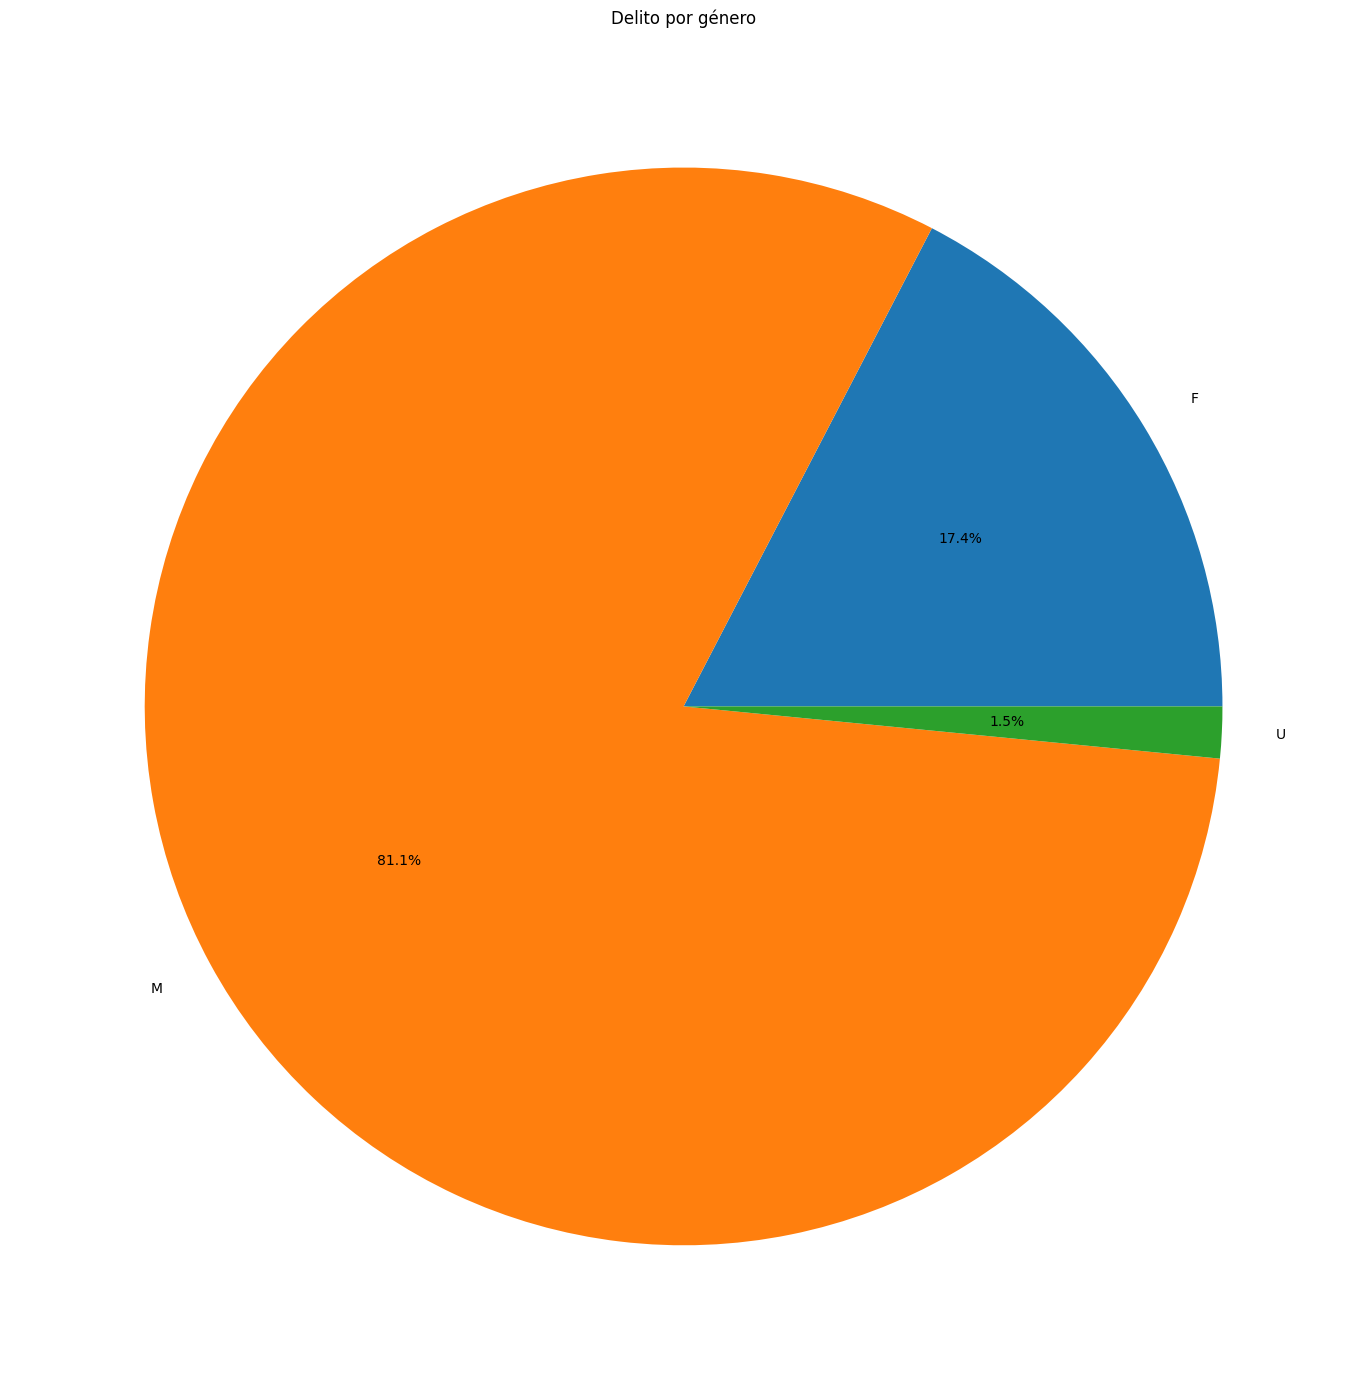

In [ ]:
value_counts = arre.groupby('PERP_SEX').size()

plt.figure(figsize=(16, 14))  # Adjust the figure size as needed
plt.pie(value_counts.values, labels=value_counts.index, autopct="%1.1f%%")  # Format as percentage
plt.title("Delito por género")
plt.tight_layout()
plt.show()

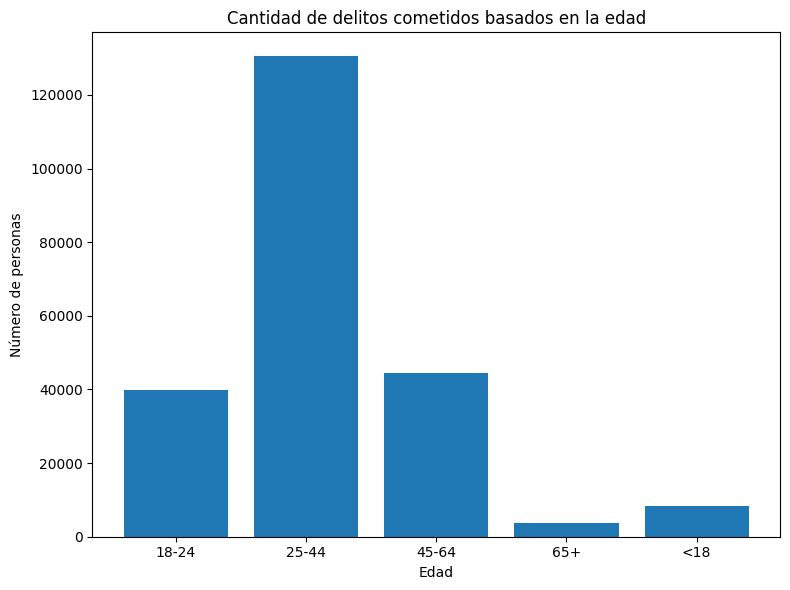

In [ ]:

# Get the value counts
value_counts = arre.groupby("AGE_GROUP").size()

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Edad")
plt.ylabel("Número de personas")
plt.title("Cantidad de delitos cometidos basados en la edad")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Uso del comando *When* y *Otherise*
El comando *when* con *otherwise*, funciona como si fuere una decisión, si, en caso contrario

### Detección de edades nulas
Para hacer la implementación de edad nulas, se hará la estratificación en función del saludo.
  1. Se hará una nueva columna que contenga los saludos de cada pasajero (Mr, Mrs, Miss)
  2. Se extrae cualquier palabra cuyo patrón se de la A hasta la Z finalizando con un (.). En otras palabras, se va a utilzar el Mr., Mrs., entre otros, para poder saber la edad promedio conforme al saludo

### Modelado utilizando la librería pyspark.ml